In [1]:
import random
import sys
import madjax
import numpy as np
import jax
import matplotlib.pyplot as plt

Folder `jet` needs to be generated in MadGraph using the madjax plugin

`$ PYTHONPATH=/global/u1/r/rmastand/MG5_aMC_v3_5_1/PLUGIN /global/u1/r/rmastand/MG5_aMC_v3_5_1/bin/mg5_aMC --mode=madjax_me_gen jet.mg5`

`jet.mg5`:
```
generate e+ e- > j j j
output madjax jet
set auto_update 0
!rm py.py
```


In [2]:
mj = madjax.MadJax("jet")

Pull `process_name` from the `jet` folder

In [3]:
# Center of mass of the collision in GeV
matrix_element_1 = mj.matrix_element(E_cm=14000., process_name='Matrix_1_epem_guux')
jacobian_1 = mj.jacobian(E_cm = 14000., process_name='Matrix_1_epem_guux')

matrix_element_2 = mj.matrix_element(E_cm=14000., process_name='Matrix_1_epem_gddx')
jacobian_2 = mj.jacobian(E_cm = 14000., process_name='Matrix_1_epem_gddx')

In [10]:
pars = {
    ("sminputs", 3): 1.180000e-01, # aS 
}

# results are not robust with respect to diff choices for random_variables! I need to investigate further...
random_variables = [0.2]*5

v_1,p_1 = matrix_element_1(pars, random_variables)
print("ME:", v_1)
print("ME prime:", p_1)

v_2,p_2 = matrix_element_2(pars, random_variables)
print("ME:", v_2)
print("ME prime:", p_2)

ME: 4.330787889772495e-10
ME prime: {('sminputs', 3): Array(3.67004623e-09, dtype=float64, weak_type=True)}
ME: 2.338525141182861e-10
ME prime: {('sminputs', 3): Array(1.98180113e-09, dtype=float64, weak_type=True)}


In [11]:
alphaS_scan_vals = np.linspace(0.01, 0.9, 50)

results_1 = [matrix_element_1({("sminputs", 3): x}, random_variables) for x in alphaS_scan_vals]
results_1 = np.asarray([(x[0],x[1][("sminputs",3)]) for x in results_1])

results_2 = [matrix_element_2({("sminputs", 3): x}, random_variables) for x in alphaS_scan_vals]
results_2 = np.asarray([(x[0],x[1][("sminputs",3)]) for x in results_2])

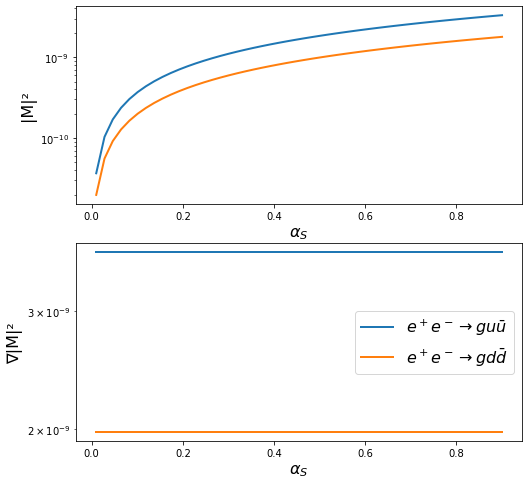

In [12]:
lw = 2
fontsize = 16
fig, ax = plt.subplots(2, 1, figsize = (8, 8))

ax[0].plot(alphaS_scan_vals, results_1[:,0],label = "$e^+e^- \\rightarrow gu\\bar{u}$", lw=lw)
ax[0].plot(alphaS_scan_vals, results_2[:,0],label = "$e^+e^- \\rightarrow gd\\bar{d}$", lw=lw)
ax[0].set_yscale("log")
ax[0].set_xlabel("$\\alpha_S$", fontsize=fontsize)
ax[0].set_ylabel("|M|²", fontsize=fontsize)

ax[1].plot(alphaS_scan_vals, results_1[:,1],label = "$e^+e^- \\rightarrow gu\\bar{u}$", lw=lw)
ax[1].plot(alphaS_scan_vals, results_2[:,1],label = "$e^+e^- \\rightarrow gd\\bar{d}$", lw=lw)
ax[1].set_xlabel("$\\alpha_S$", fontsize=fontsize)
ax[1].set_ylabel("∇|M|²", fontsize=fontsize)
ax[1].set_yscale("log")

plt.legend(fontsize=fontsize)

plt.show()